# Introduction

In this project, you will build a neural network of your own design to evaluate the Fashion MNIST dataset.

## Imports

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

## Load the Dataset

Specify your transforms as a list if you intend to.
The transforms module is already loaded as `transforms`.

FashionMNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `FashionMNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Create test set and define test dataloader
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



100%|██████████| 26421880/26421880 [00:08<00:00, 3002206.98it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 232226.15it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4249549.76it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17068993.67it/s]

Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



In [1]:
#ToDo: find size of training dataset


Check shapes of Inputs and Outputs

In [ ]:
dataiter = iter(trainloader) #queue containing the batches
images, labels = dataiter.next() #fetches the next batch in the queue
print(type(images))
print(images.shape)
print(labels.shape)
print(labels)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([5, 9, 3, 9, 1, 9, 5, 6, 5, 0, 0, 8, 0, 9, 1, 9, 0, 9, 5, 3, 7, 5, 5, 9,
        8, 1, 5, 5, 2, 7, 7, 8, 9, 8, 1, 2, 4, 5, 8, 6, 1, 4, 4, 9, 1, 6, 6, 0,
        2, 6, 9, 0, 4, 3, 4, 9, 8, 6, 8, 0, 4, 4, 3, 7])


In [ ]:
#ToDo: Split the training dataset into training and validation datasets

trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])

trainloader_new = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)



## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


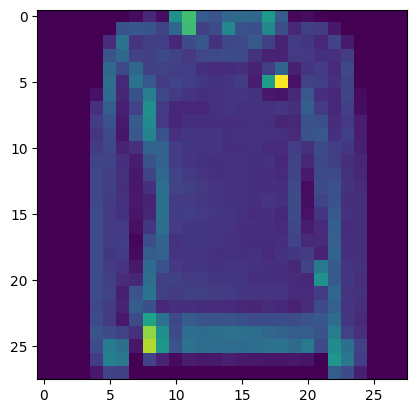

0


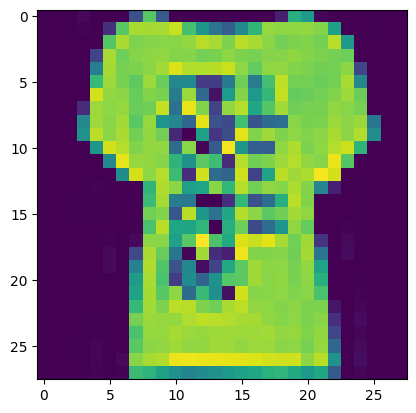

7


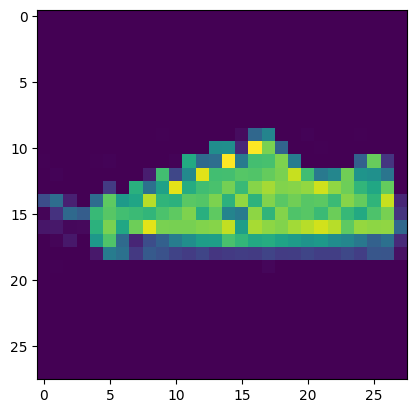

2


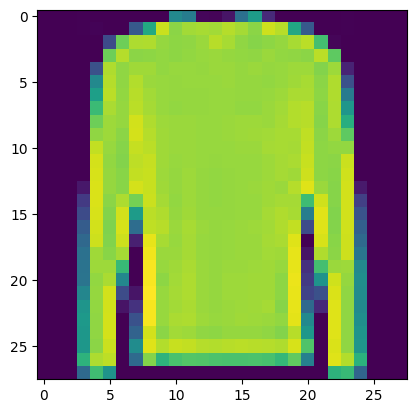

7


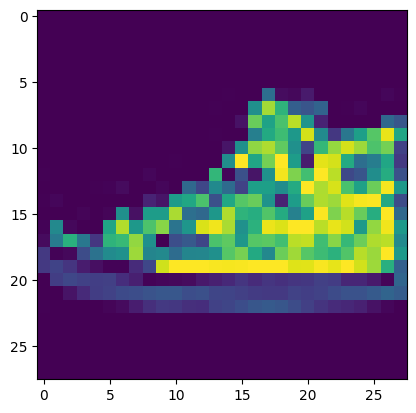

In [ ]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader_new)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [ ]:
## YOUR CODE HERE ##
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Define dropout layers with a dropout probability (e.g., 0.2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after the rhird layer
        x=self.fc4(x) #output shape ((64,10)) #No dropout added
        #print(x.shape)
        x = F.log_softmax(x, dim=1) #logsoftmax for each row
        #print(x.shape) #output shape ((64,10))
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
## Create Model Instance, Evaluation Criteria, and define the optimizer
model = Classifier()
# ToDo: Answer. Is the use of this Loss function Correct/
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
#Training Loop
epochs = 10
TLL=[]
VLL=[]
valid_loss=0;running_loss=0;
for e in range(epochs):
    running_loss = 0
    valid_loss = 0

    model.train()
    for images, labels in trainloader_new:

        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    model.eval()
    for images, labels in validloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels) #summing
        valid_loss += loss.item()
    else:
        T=running_loss/len(trainloader_new) #Error/batch
        V=valid_loss/len(validloader)    #Error/batch
        print(f"Epoch: {e}", f"    Training loss: {T}",f"    Validation loss: {V}")
        TLL.append(T)
        VLL.append(V)


Epoch: 0     Training loss: 0.4850573281743633     Validation loss: 0.4856184307001293
Epoch: 1     Training loss: 0.4512567511563108     Validation loss: 0.4615454766224188
Epoch: 2     Training loss: 0.42137227501315094     Validation loss: 0.4503408722849543
Epoch: 3     Training loss: 0.40758214910020196     Validation loss: 0.42724991451575556
Epoch: 4     Training loss: 0.39395499318393307     Validation loss: 0.42263060223573307
Epoch: 5     Training loss: 0.3846311257528598     Validation loss: 0.42918463302319493
Epoch: 6     Training loss: 0.3730080956335007     Validation loss: 0.4492637767657034
Epoch: 7     Training loss: 0.3618254189107464     Validation loss: 0.4208239553325466
Epoch: 8     Training loss: 0.36316481235820347     Validation loss: 0.4187644953285453
Epoch: 9     Training loss: 0.3561730970388282     Validation loss: 0.437413103386029
Epoch: 10     Training loss: 0.3498198396043737     Validation loss: 0.43933097713156294
Epoch: 11     Training loss: 0.3409

KeyboardInterrupt: 

In [ ]:
#Evaluate Model Accuracy using the test dataset